# Funcion de costo para SVM
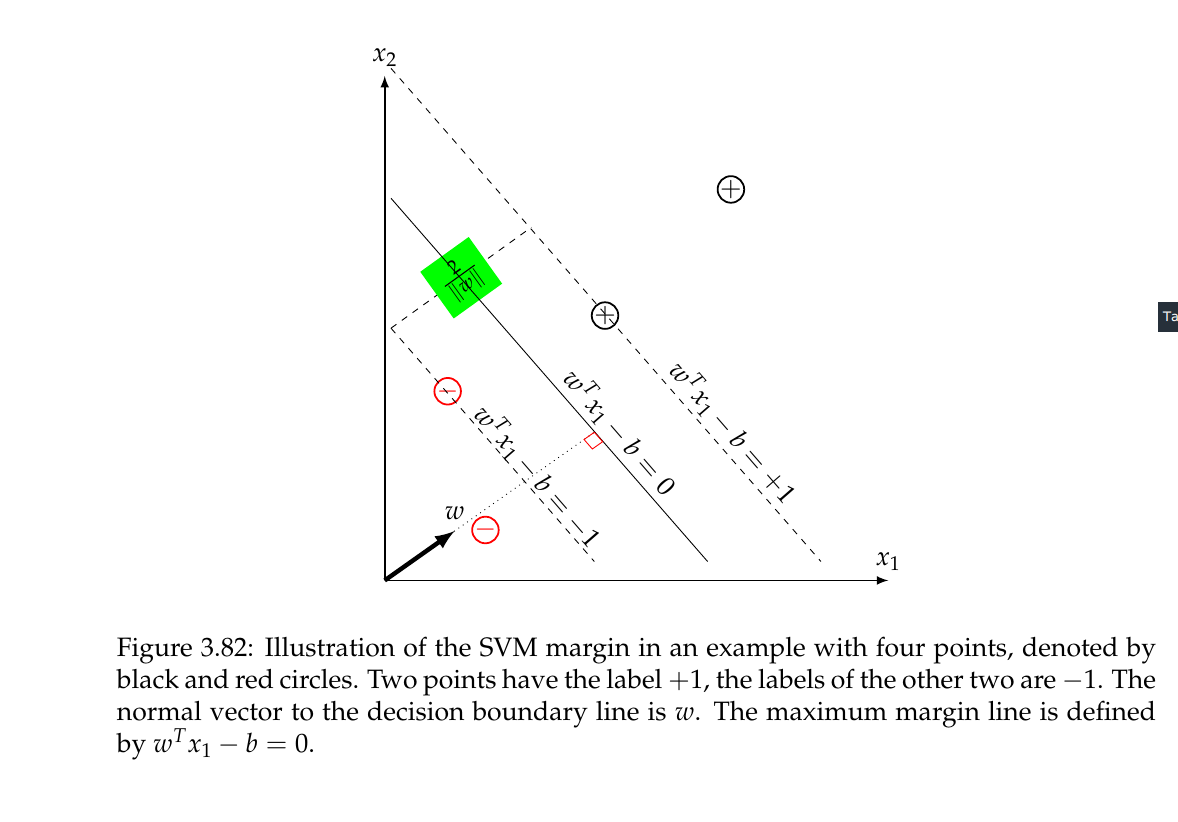

En 2D representamos line divisoria (boundary line) entre las dos regiones (el hiperplano) $x_2 = a x_1 - b$ donde $a$ es la pendiente y $-b$ el intercepto. Por que $-b$ y no $b$, por conveniencia.  Aca $a,b,x_1, x_2 \in \mathbb{R}$.

Tenemos entonces:

\begin{eqnarray}
x_2 &=& a x_1 - b \\
0 &=& a x_1 - x_2 - b \\
0 &=& (a, -1) \cdot (x_1, x_2) - b \\
0 &=& \binom{a}{-1}^T \binom{x_1}{x_2} - b  
\end{eqnarray}

Lo bonito es que podemos generalizar directamente a vectores en $\mathbb{R}^n$.

La ecuacion queda como

$$ 0 = w^T x - b  $$
donde ahora $x, b, w \in \mathbb{R}^n$ y $w$ es un vector ortogonal al plano.
Ver tarea #3 de ML (algebra lineal).

Es mas, vimos que si

$$ w^T x - b = \pm \delta$$ , la distancia entre los dos hiperplanos (paralelos)
es $2 \delta/\|w \|$. 


Tenemos dos conjuntos de datos: los "+" y los "-" $\oplus$ y $\ominus$. 
cuando $\delta = 0$ estamos en el hiperplano divisorio (el de la mitad).

Si un punto $x^{(i)}$  estan a la derecha ($y^{(i)} = \oplus$) tenemos lo siguiente:

$$w^T x^{(i)} - b > 0  \quad, \quad \text{dado que  }  y^{(i)} = 1 $$
Si la etiqueta es $y^{(i)} = \ominus$, entonces

$$w^T x^{(i)} - b < 0  \quad, \quad \text{dado que  }  y^{(i)} = -1 $$


Los puntos de control (de soporto SVM) estan a una distancia $2 \delta /\| w \|$

Podemos reescribir las ecuaciones anteriores como

\begin{eqnarray}
w^T x^{(i)} - b  &=& \delta \quad, \quad \text{si  } y^{(i)} = 1 \\
w^T x^{(i)} - b  &=& -\delta \quad, \quad \text{si  } y^{(i)} = -1 \\
\end{eqnarray}

Es interesante que estas dos ecuaciones se pueden mezclar en una sola, como hemos hecho en otras ocaciones. 

$$y^{(i)} ( w^T x^{(i)} - b) = \delta   \quad, \quad \delta> 0 $$
Esta es una restriccion. Voy a asumir que $\delta=1$. Usted dice, "profe eso es muy arbitrario", yo digo si, pero $y^{(i)} = \pm 1$ tambien es arbitrario, de forma que si yo digo que $y^{(i)} = \pm \delta$  en la ecuacion anterior

$$y^{(i)} ( w^T x^{(i)} - b) = 1   \quad, \quad y^{(i)} = \pm 1 \quad (1)$$.
Si esto no fuera suficiente, tambien podemos decir que $w$ tiene tamano arbitrario. Tambien podria normalizar por aca. O tambien $w \leftarrow w/\delta$

Mejor dicho la ecuacion (1) es normalizada (con 1 la derecha) y resuelve el mismo problema. 

Aca $w$ es la "incognita", el parametro de aprendizaje, lo que en todo el curso hemos llamado $\theta$. 

El margen entre las dos lineas de control (de soporte).

$$\text{ el doble de la distancia al centro es } = \frac{2 \delta}{ \| w \|}$$ .

$w \ne 0$ por que es un vector director. 

Ahora bien queremos minimizar, no maximizar (por que? por que asi disenamos los algoritmos de descenso con gradiente). Entonces en vez de $2/ \| w \|$ usamos
$\|w \|/2$.   De acuerdo a esto, la funcion objetivo, es

$$ \min_{w} \frac{\|w \|^2}{2}  \quad , \quad \text{sujeto a     } y^{(i)}( w^T x^{(i)} - b )  = 1  $$

Este es un problema de multiplicadores de Lagrange.

Se da una funcion $f(x)$ que se quiere minimizar y una condicion $g(x)=0$ (pueden ser vectorials y pueden varias restricciones, pero por ahora solo consideramos una).

El metodo de multiplicadores de Lagrange forma una funcion objetivo

$$ L(\theta, \lambda) = J(x, \lambda) = f(\theta) + \lambda g(\theta) $$.

Este problema como se resuelve. Se resuelven las ecuaciones

$$ \nabla_{x, \lambda} L(\theta, \lambda) = 0$$, aca las incogintas son $\theta, \lambda$

En nuestro caso particular la funcion objetivo (de Lagrange ) es:

$$J(w) = \frac{ \|w\|^2}{2} + \sum_{i=1}^m C_i (1 - y^{(i)}[ w^T x^{(i)}  - b])    \quad, \quad (2) $$

$C$ juega el papel de $\lambda$ y pasa a ser un parametro de regularizacion.




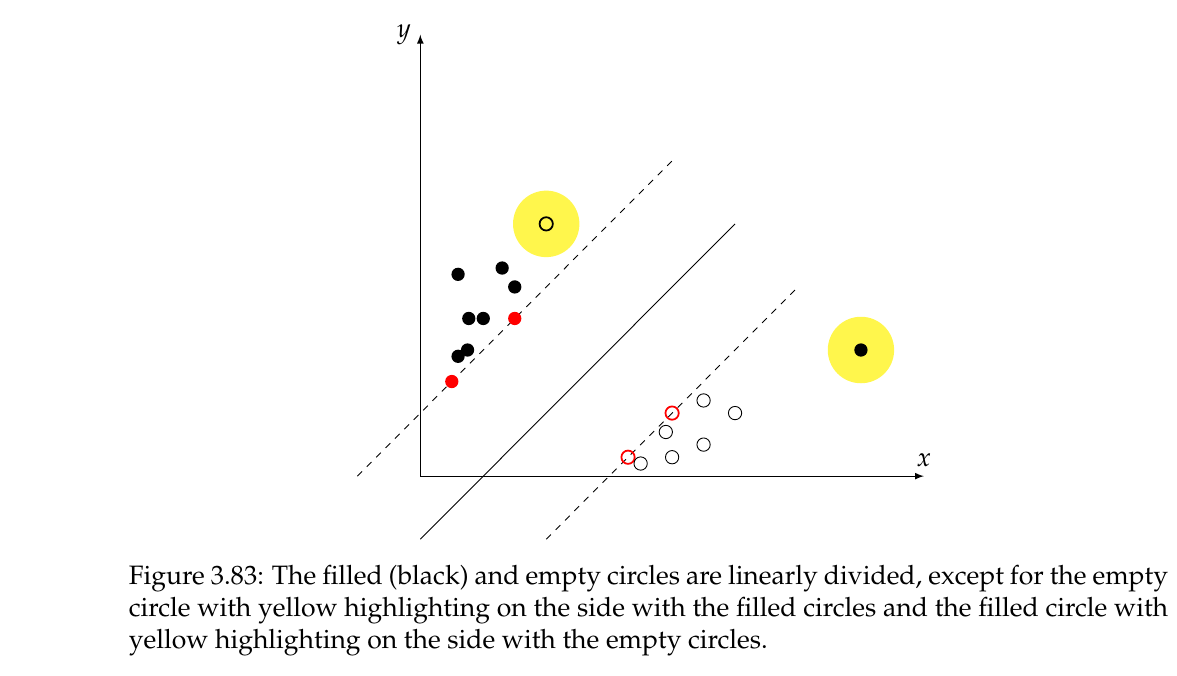

9:15

## Kernels: 
Los kernels son funciones que mapean los datos a otro espacio "curvo" de forma que podamos "enderezar" trayectorias de forma que podamos usar SVM en datos que no son linealmente separables. Es decir, que no exista un hiperplano que separe completamente los datos en dos grupos distintos. 


Veamos ejemplos.

En 1D. 



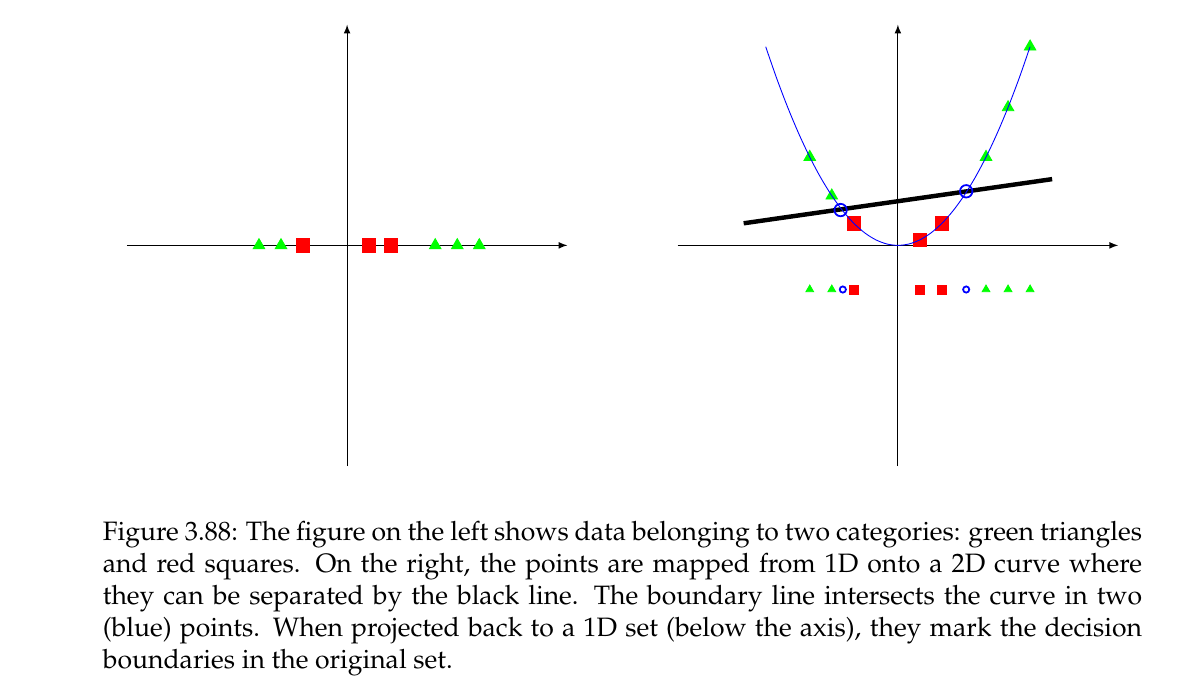

Los datos en una dimesison, se "backproject"  a dos dimensiones. 
Es decir:

\begin{eqnarray}
\Phi: \mathbb{R} &\to& \mathbb{R}^2 \\
 x &\mapsto& (x, x^2) 
\end{eqnarray}

Los pasos son:

* Encontrar $\Phi$ que me mapee (backproject) los puntos de un espacio donde los puntos **no son linealmente separables** a un espacio donde si lo son.
* Aplicar SVM en el nuevo espacio (de llegada) donde los datos **si son linealmente separables** . Esto me genera el hiperplano de separacion.
* Hallar la interseccion del hiperplano de separacion con la hiper-superficie del Kernel (en el ejemplo de arriba es la parabola). La interseccion de estos dos, finalmente

* se proyecta al espacio original. Esta va a ser la **frontera de decision** (decision boundary).

Que pasa si los datos estan sesgados. Por ejemplo hacia la derecha.
Tambien se prodrian partir pero el margen es mas reducido como 
se muestra en la figura a continuacion. 

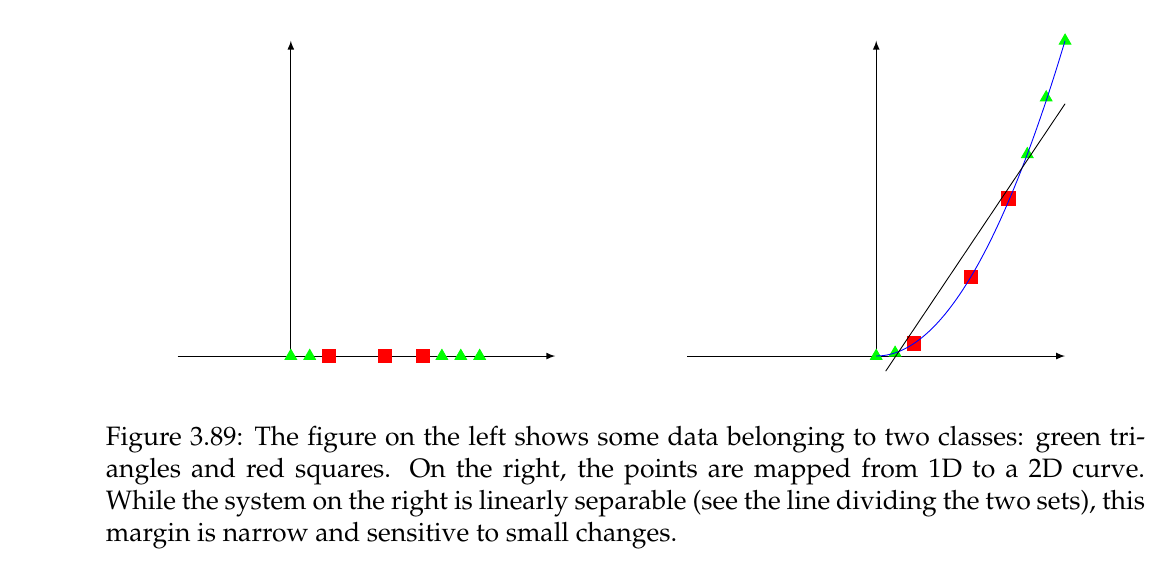

Una solucion a este problema es la normalizacion por la media. Es decir, si les restamos la media los "centramos".

$$ x^{(i)} \rightarrow x^{(i)} -  \mu  $$

Los pasos ahora son:

* Normalizar los datos , restar la media para queden centrados.

* Encontrar $\Phi$ que me mapee (backproject) los puntos de un espacio donde los puntos **no son linealmente separables** a un espacio donde si lo son.
* Aplicar SVM en el nuevo espacio (de llegada) donde los datos **si son linealmente separables** . Esto me genera el hiperplano de separacion.
* Hallar la interseccion del hiperplano de separacion con la hiper-superficie del Kernel (en el ejemplo de arriba es la parabola). La interseccion de estos dos, finalmente

* se proyecta al espacio original. Esta va a ser la **frontera de decision** (decision boundary).

* se suma de nuevo la media para "desnormalizarlos*. 

Ejemplo en 2D.

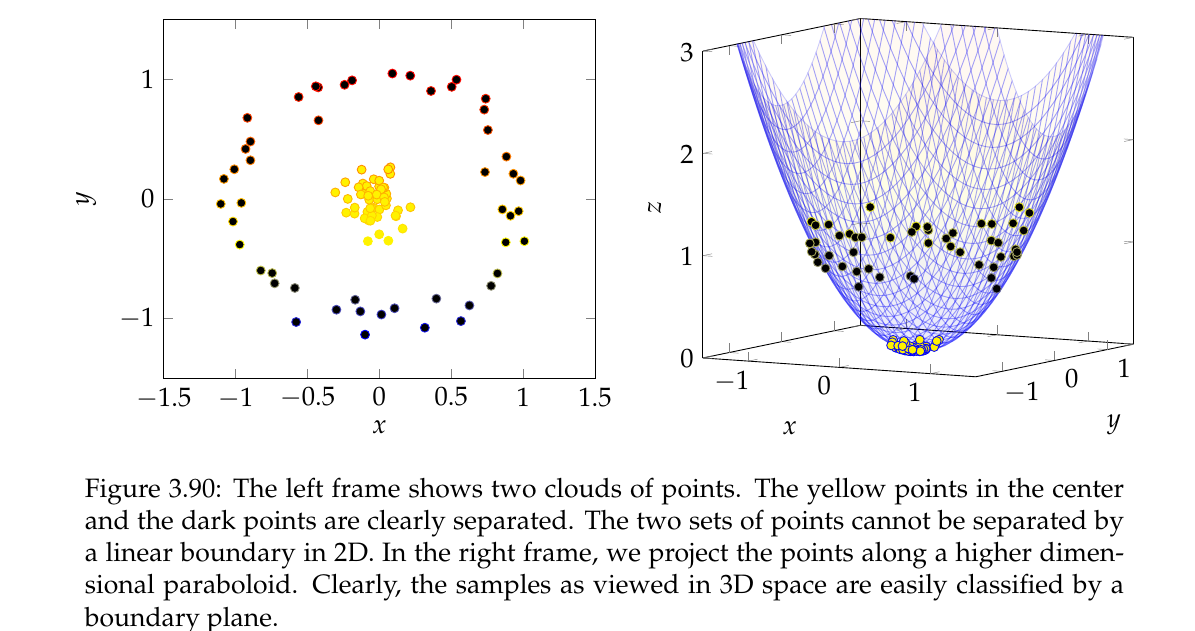

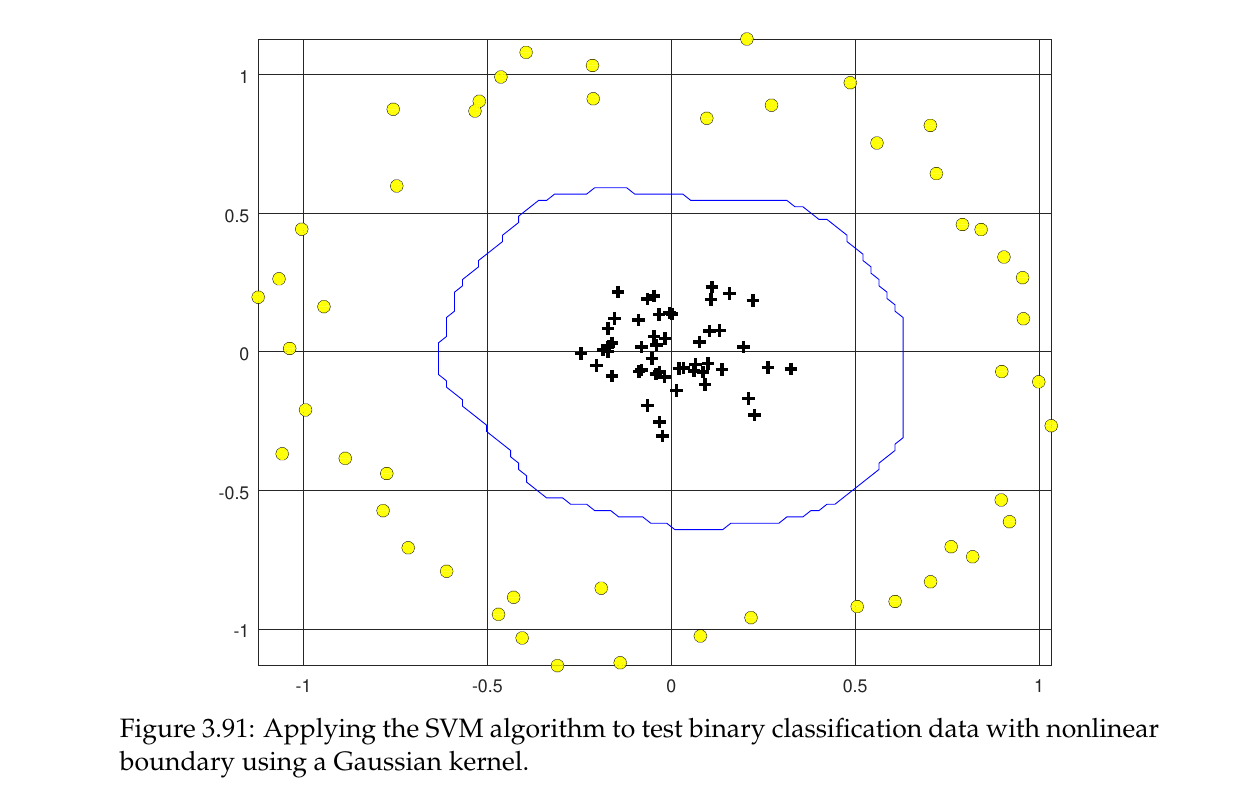

Para encontrar $w$ necesitamos resolver el problema de opitmizacion

$$  \min_w J(w)  $$
donde $J$ esta definido en ecuacion (2).

Una forma es la tradicional de hallar el gradiente y usar optimizacion como gradiente conjugado no lineal u otras (metodos de Newton, etc).

Otra es usar metodos analiticos para convertir esta ecuacion a otra que se mas facil de resolver.

Veamos esta segunda. 

Reescribamos el "Lagrangiano" (2) en terminos de $\lambda$ en vez de $C$.

Andrew Ng encuentra una funcion de costo $J_r(\theta)$. Y el la regulariza 
de la siguiente forma

$$ J(\theta) = J_r(\theta) + \lambda \frac{ \| \theta \|^2}{2}  $$

Luego el divide por $\lambda$,

$$ J(\theta) =  \frac{1}{\lambda} J_r(\theta) +  \frac{\| \theta \|^2}{2} $$

El define a $C$ como $1/\lambda$.
Y queda:

$$ J(\theta) = C J_r(\theta) +  \frac{\| \theta \|^2}{2} $$
Noque que por equacion (2)

$$J_r(\theta) =  \sum_{i=1}^m (1 - y^{(i)}[ w^T x^{(i)}  - b])  $$
y $C=1/\lambda$. 

Escribamos la ecuacion de Lagrange (cambiando el vector $C$ por $\lambda$ en la ecuacion 2).

$$L(w, b, \lambda) = \frac12 \| w \|^2  - \sum_i \lambda_i [y_i ( w \cdot x_i - b) -1 ]  $$

Toca hallar el gradiente:

$$\nabla L(w, b, \lambda) = \nabla \left [ \frac12 \| w \|^2  - \sum_i \lambda_i [y_i ( w \cdot x_i - b) -1 ]  \right ]  = 0 \quad , \quad (3) $$

Por favor revise las notas para obtner la ecuacion:


$$L(\lambda) = -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum_i \lambda_i  $$
sujeto a $\sum \lambda_i y_i = 0$.
A esto se llega resolviendo la ecuacion (3) que elimina $w$ y $b$. 

Esta ecuacion es mucho mas simple de resolver por que es problema cuadratico
y la derivada es lineal, o sea que se resuelve mucho mas facil.

Otra cosa interesante es ver que $x_i \cdot x_j$ estan en "todas partes".

Cuando se aplican kernes, queremos saber a donde van estos datos

$$ x_i \cdot x_j \rightarrow \Phi(x_i) \cdot \Phi(x_j) $$

Isabel Guyon (1993) introduce el

### Kernel Trick. 
Consiste en reemplazar $\Phi(x) \cdot \Phi(y)$ por $k(x,y)$ donde $k(x,y)$
es una expresion mas simple y la evaluacion mucho mas rapida. Esto ayudo a que SVM sea lo que es hoy. 

Ejemplos de kernel trick.

2D:

\begin{eqnarray}
\Phi : \mathbb{R}^2 &\to& \mathbb{R}^3 \\
(x_1, x_2) &\mapsto& \Phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2).
\end{eqnarray}

Entramos que $k(x,y) = \Phi(x) \cdot \Phi(y)$ para $k(x,y)=(x \cdot y)^2$. 
Veamos:


$$k(x,y) = (x \cdot y)^2 = \left ( \sum_{i=1}^2 x_i y_i \right )^2 = x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2  $$

Ahora bien

$$\Phi(x) \cdot \Phi(y) = (x_1^2, x_2^2,  \sqrt{2} x_1 x_2) \cdot (  y_1^2, y_2^2, \sqrt{2} y_1 y_2) = x_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2   $$
de forma que $\Phi(x) \cdot \Phi(y) = k(x,y)$. 

Por es importante el kernel, contemos operaciones:

* Con el producto interno: 7 multiplicaciones y 2 sumas, 4 cuadrados
* Usando el kernel $k(x,y)$, 2 multiplicaciones 1 suma y un cuadrado.

Para $n=3$

\begin{eqnarray}
\Phi : \mathbb{R}^2 &\to& \mathbb{R}^3 \\
(x_1, x_2, x_3) &\mapsto& \Phi(x_1, x_2, x_3) = (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3).
\end{eqnarray}

Entramos que $k(x,y) = \Phi(x) \cdot \Phi(y)$ para $k(x,y)=(x \cdot y)^2$. 
Veamos:


$$k(x,y) = (x \cdot y)^2 = \left ( \sum_{i=1}^3 x_i y_i \right )^2 = \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j   $$

Ahora bien

$$\Phi(x) \cdot \Phi(y) = (x_1^2, x_2^2, x_3^2,  \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3) \cdot (  y_1^2, y_2^2, y_3^2,  \sqrt{2} y_1 y_2, \sqrt{2} y_1 y_3, \sqrt{2} y_2 y_3 ) = \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j  $$
de forma que $\Phi(x) \cdot \Phi(y) = k(x,y)$. 


Contemos operaciones:

* En producto interno: 12 multiplicaciones, 5 sumas, 6 cuadrados.
* El $k(x,y)$, 3, 2 y un cuadrado.


Un kernel muy popular es el gaussiano.


$$ k(x_i, x_j ) = \mathrm{e}^{- \frac{(x_i - x_j)^2}{2 \sigma^2} } $$

La pregunta es cuale es el mapeo $\Phi$, tal que

$\Phi(x_i) \cdot \Phi(x_j)  = k(x_i, x_j)$.

[RBF for SVM](https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b)

